In [19]:
#I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10", i had to put the link within the double quote inside the anaconda prompt i.e anaconda cmd
# initially it was 5000 rows we had to reduce the limit to 15 rows because for easy exploration and also because we want to set a time to be collecting the 15 rows dataset every 60sec or 120sec(time is in seconds) or anytime we want, so having 5000 rows will be ambigous, imagine collecting 10 datasets of 5000 rows.


from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '57397ceb5a964bb2a35e662c3bae0a7c',
}
session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [20]:
type(data)

dict

In [22]:
import pandas as pd
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_columns', None)

In [23]:
pd.json_normalize(data['status'])

,timestamp,error_code,error_message,elapsed,credit_count,notice,total_count
0,2025-10-22T12:29:19.919Z,0,None,32,1,None,9405


In [24]:
#this normalizes the data and puts it in a data frame
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12442,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.993826e+07,1.993826e+07,False,NaN,1,NaN,NaN,None,2025-10-22T12:27:00.000Z,108104.622771,1.018545e+11,65.3480,0.173815,-0.993477,-3.319047,-4.086133,-6.242699,-8.821843,2.155418e+12,59.0562,2.270197e+12,None,2025-10-22T12:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-22 13:29:23.395848
1,1027,Ethereum,ETH,ethereum,10924,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206984e+08,1.206984e+08,True,NaN,2,NaN,NaN,None,2025-10-22T12:27:00.000Z,3847.392332,5.186462e+10,44.8956,0.518508,-1.497348,-6.116720,-8.211623,-18.432498,5.561730,4.643739e+11,12.7234,4.643739e+11,None,2025-10-22T12:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-22 13:29:23.395848
2,825,Tether USDt,USDT,tether,154358,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.824141e+11,1.859792e+11,True,NaN,3,NaN,NaN,None,2025-10-22T12:27:00.000Z,1.000779,1.939694e+11,46.3396,0.030212,0.039484,0.015497,0.015184,0.127351,0.020279,1.825562e+11,5.0043,1.861241e+11,None,2025-10-22T12:27:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-10-22 13:29:23.395848
3,1839,BNB,BNB,bnb,2861,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.391808e+08,1.391803e+08,1.391803e+08,False,NaN,4,NaN,NaN,None,2025-10-22T12:28:00.000Z,1069.136621,4.079232e+09,5.8260,-0.334919,-1.189943,-9.993745,4.464000,20.126255,39.023861,1.488027e+11,4.0791,1.488033e+11,None,2025-10-22T12:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-22 13:29:23.395848
4,52,XRP,XRP,xrp,1733,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.997544e+10,9.998578e+10,False,NaN,5,NaN,NaN,None,2025-10-22T12:27:00.000Z,2.405113,5.066872e+09,9.5447,0.239876,-1.622644,-3.762722,-14.754971,-20.837192,-24.077187,1.442477e+11,3.9557,2.405113e+11,None,2025-10-22T12:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-22 13:29:23.395848
5,5426,Solana,SOL,solana,1030,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.466647e+08,6.124279e+08,True,NaN,6,5.252369e+08,9.779567e+10,None,2025-10-22T12:27:00.000Z,186.193461,8.330152e+09,48.5286,0.556744,-0.655337,-8.307388,-16.137859,-7.985723,-0.029135,1.017854e+11,2.7907,1.140301e+11,None,2025-10-22T12:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-22 13:29:23.395848
6,3408,USDC,USDC,usd-coin,33291,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,7.668241e+10,7.668241e+10,False,NaN,7,6.090122e+10,6.089538e+10,None,2025-10-22T12:27:00.000Z,0.999904,2.204641e+10,28.1894,0.011237,-0.014249,0.013316,0.012219,0.009920,-0.009554,7.667506e+10,2.1027,7.667506e+10,None,2025-10-22T12:27:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-10-22 13:29:23.395848
7,1958,TRON,TRX,tron,1250,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.466523e+10,9.466523e+10,True,NaN,8,9.466789e+10,3.031589e+10,None,2025-10-22T12:27:00.000Z,0.320234,1.026825e+09,70.3177,0.331354,-0.683881,0.655773,-6.238980,-11.502073,3.486666,3.031504e+10,0.8312,3.031504e+10,None,2025-10-22T12:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-22 13:29:23.395848
8,74,Dogecoin,DOGE,dogecoin,1332,2013-12-15T00:00:00.000Z,"[minea

In [49]:
#I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# initially it was 5000 rows we had to reduce the limit to 15 rows because for easy exploration and also because we want to set a time to be collecting the 15 rows dataset every 60sec or 120sec(time is in seconds) or anytime we want, so having 5000 rows will be ambigous, imagine collecting 10 datasets of 5000 rows.




def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0f522e9b817b43bab55ed02d801a4838',
    }
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print("request failed:", e)
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = pd.concat([df, df2], ignore_index=True)

In [50]:
import os 
from time import time
from time import sleep


for i in range(333):
    api_runner()
    print('API runner completed successfuly')
    sleep(60)
exit()
    


API runner completed successfuly
API runner completed successfuly
API runner completed successfuly
API runner completed successfuly
request failed: HTTPSConnectionPool(host='pro-api.coinmarketcap.com', port=443): Max retries exceeded with url: /v1/cryptocurrency/listings/latest?start=1&limit=15&convert=USD (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000026A2EEA0A50>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


UnboundLocalError: cannot access local variable 'data' where it is not associated with a value

In [28]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [51]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12442,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.993826e+07,1.993826e+07,False,NaN,1,NaN,NaN,None,2025-10-22T13:30:00.000Z,108162.177227,1.023260e+11,60.6096,0.074369,-0.528602,-2.880584,-4.271574,-5.923687,-8.897810,2.156565e+12,58.9983,2.271406e+12,None,2025-10-22T13:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-22 14:31:38.691676
1,1027,Ethereum,ETH,ethereum,10924,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206984e+08,1.206984e+08,True,NaN,2,NaN,NaN,None,2025-10-22T13:30:00.000Z,3852.463420,5.121362e+10,40.5414,0.117033,-0.879065,-5.292502,-8.265717,-18.297079,5.652613,4.649860e+11,12.7209,4.649860e+11,None,2025-10-22T13:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-22 14:31:38.691676
2,825,Tether USDt,USDT,tether,154376,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.824141e+11,1.859792e+11,True,NaN,3,NaN,NaN,None,2025-10-22T13:30:00.000Z,1.000464,1.919590e+11,41.9276,-0.025569,0.022617,-0.017380,-0.027430,0.059564,-0.012426,1.824987e+11,4.9928,1.860655e+11,None,2025-10-22T13:30:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-10-22 14:31:38.691676
3,1839,BNB,BNB,bnb,2863,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.391808e+08,1.391803e+08,1.391803e+08,False,NaN,4,NaN,NaN,None,2025-10-22T13:30:00.000Z,1079.433543,4.153310e+09,8.2550,0.965824,0.306960,-8.317689,5.152857,21.121710,40.328588,1.502359e+11,4.1102,1.502364e+11,None,2025-10-22T13:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-22 14:31:38.691676
4,52,XRP,XRP,xrp,1733,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.997544e+10,9.998578e+10,False,NaN,5,NaN,NaN,None,2025-10-22T13:30:00.000Z,2.407313,5.017961e+09,7.1603,0.034109,-0.669276,-3.063868,-15.621900,-20.308138,-24.234111,1.443797e+11,3.9499,2.407313e+11,None,2025-10-22T13:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-22 14:31:38.691676
5,5426,Solana,SOL,solana,1030,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.466646e+08,6.124279e+08,True,NaN,6,5.252369e+08,9.771712e+10,None,2025-10-22T13:30:00.000Z,186.043898,8.298671e+09,46.1352,-0.185452,-0.107290,-7.782259,-16.674925,-7.754204,-0.208702,1.017036e+11,2.7825,1.139385e+11,None,2025-10-22T13:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-22 14:31:38.691676
6,3408,USDC,USDC,usd-coin,33298,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,7.670621e+10,7.670621e+10,False,NaN,7,6.090122e+10,6.089682e+10,None,2025-10-22T13:30:00.000Z,0.999928,2.212007e+10,25.8140,-0.021667,0.006077,0.025454,0.005584,-0.013638,-0.007346,7.670067e+10,2.0983,7.670067e+10,None,2025-10-22T13:30:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-10-22 14:31:38.691676
7,1958,TRON,TRX,tron,1250,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.466511e+10,9.466512e+10,True,NaN,8,9.466789e+10,3.037614e+10,None,2025-10-22T13:30:00.000Z,0.320871,1.051228e+09,70.0164,0.201543,-0.512757,1.118675,-5.824480,-11.624658,2.933392,3.037525e+10,0.8310,3.037525e+10,None,2025-10-22T13:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-22 14:31:38.691676
8,74,Dogecoin,DOGE,dogecoin,1332,2013-12-15T00:00:00.000Z,"[m

In [45]:
#sending it directly to a csv File

In [41]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0f522e9b817b43bab55ed02d801a4838',
    }
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print("request failed:", e)
        
    df = pd.json_normalize(data['data']) #we had to remove df2 so it doesn't create duplicates inside the csv file
    df['timestamp'] = pd.to_datetime('now')
    df 
    
    if not os.path.isfile(r'C:\Users\somte\Desktop\alex the analyst\API.csv'): #here it checks if the file path exists
        df.to_csv(r'C:\Users\somte\Desktop\alex the analyst\API.csv', header= 'column_names') # if it doesn't this creates it
    else:
        df.to_csv(r'C:\Users\somte\Desktop\alex the analyst\API.csv', mode='a', header = False)#if it does, this guy just appends data to it

    

In [42]:
import os 
from time import time
from time import sleep


for i in range(333):
    api_runner()
    print('API runner completed successfuly')
    sleep(60)
exit()

API runner completed successfuly
API runner completed successfuly
API runner completed successfuly
API runner completed successfuly
API runner completed successfuly
API runner completed successfuly


KeyboardInterrupt: 

In [69]:
df5 = pd.read_csv(r'C:\Users\somte\Desktop\alex the analyst\API.csv')

In [70]:
df5

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,12442,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19938256.00000,19938256.00000,False,NaN,1,NaN,NaN,NaN,2025-10-22T13:24:00.000Z,108261.00276,103360511680.96471,61.86500,0.27665,-0.39983,-2.98108,-4.15110,-5.88891,-8.82464,2158535587763.75073,59.01540,2273481057873.81006,NaN,2025-10-22T13:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-22 14:26:17.374837
1,1,1027,Ethereum,ETH,ethereum,10924,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120698359.21669,120698359.21669,True,NaN,2,NaN,NaN,NaN,2025-10-22T13:24:00.000Z,3855.13609,51333940009.06612,39.66250,0.28849,-0.73096,-5.60062,-8.41186,-18.22126,5.71126,465308601217.66815,12.72180,465308601217.66998,NaN,2025-10-22T13:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-22 14:26:17.374837
2,2,825,Tether USDt,USDT,tether,154372,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,182414087777.58279,185979160912.54749,True,NaN,3,NaN,NaN,NaN,2025-10-22T13:24:00.000Z,1.00031,192203339988.04947,42.00160,-0.02318,-0.00296,-0.03333,-0.03784,0.07310,-0.03003,182470930662.82651,4.99090,186037114726.48001,NaN,2025-10-22T13:24:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-10-22 14:26:17.374837
3,3,1839,BNB,BNB,bnb,2863,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",139180799.97000,139180280.59000,139180280.59000,False,NaN,4,NaN,NaN,NaN,2025-10-22T13:25:00.000Z,1078.61273,4149108896.56810,8.12980,0.86037,0.25624,-8.30942,5.08255,20.99044,40.24266,150121622825.04160,4.10610,150122183034.92001,NaN,2025-10-22T13:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-22 14:26:17.374837
4,4,52,XRP,XRP,xrp,1733,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,59975443601.00000,99985782669.00000,False,NaN,5,NaN,NaN,NaN,2025-10-22T13:24:00.000Z,2.40618,5013547774.71462,7.27140,-0.03633,-0.59815,-3.35872,-15.62533,-20.43983,-23.96483,144312009907.83835,3.94560,240618495242.66000,NaN,2025-10-22T13:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-22 14:26:17.374837
5,5,5426,Solana,SOL,solana,1030,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,546664609.07723,612427889.47800,True,NaN,6,525236893.30000,97670194724.16795,NaN,2025-10-22T13:24:00.000Z,185.95456,8299117393.93385,46.43850,-0.14764,-0.05424,-8.06396,-16.77799,-7.87114,-0.14945,101654776156.19040,2.77930,113883757943.98000,NaN,2025-10-22T13:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-22 14:26:17.374837
6,6,3408,USDC,USDC,usd-coin,33297,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,76706208177.56052,76706208177.56052,False,NaN,7,60901219650.23000,60886423077.26011,NaN,2025-10-22T13:24:00.000Z,0.99976,22336456662.28568,27.39360,-0.01695,-0.02090,-0.01351,-0.00498,-0.00278,-0.03303,76687571621.29675,2.09670,76687571621.30000,NaN,2025-10-22T13:24:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-10-22 14:26:17.374837
7,7,1958,TRON,TRX,tron,1250,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,94665106647.97353,94665119233.28893,True,NaN,8,94667886298.42999,30379591633.21766,NaN,2025-10-22T13:24:00.000Z,0.32091,1052939559.74594,71.06270,0.21711,-0.454

In [46]:
# back to normal df

In [71]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12442,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19938256.00000,19938256.00000,False,NaN,1,NaN,NaN,None,2025-10-22T13:30:00.000Z,108162.17723,102326020613.22206,60.60960,0.07437,-0.52860,-2.88058,-4.27157,-5.92369,-8.89781,2156565179065.62695,58.99830,2271405721763.14014,None,2025-10-22T13:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-22 14:31:38.691676
1,1027,Ethereum,ETH,ethereum,10924,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120698359.21669,120698359.21669,True,NaN,2,NaN,NaN,None,2025-10-22T13:30:00.000Z,3852.46342,51213620712.09148,40.54140,0.11703,-0.87906,-5.29250,-8.26572,-18.29708,5.65261,464986013781.61926,12.72090,464986013781.62000,None,2025-10-22T13:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-22 14:31:38.691676
2,825,Tether USDt,USDT,tether,154376,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,182414087777.58276,185979160912.54749,True,NaN,3,NaN,NaN,None,2025-10-22T13:30:00.000Z,1.00046,191959012705.89548,41.92760,-0.02557,0.02262,-0.01738,-0.02743,0.05956,-0.01243,182498725204.49866,4.99280,186065452480.44000,None,2025-10-22T13:30:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-10-22 14:31:38.691676
3,1839,BNB,BNB,bnb,2863,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",139180799.97000,139180280.59000,139180280.59000,False,NaN,4,NaN,NaN,None,2025-10-22T13:30:00.000Z,1079.43354,4153310156.18681,8.25500,0.96582,0.30696,-8.31769,5.15286,21.12171,40.32859,150235863386.39777,4.11020,150236424022.59000,None,2025-10-22T13:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-22 14:31:38.691676
4,52,XRP,XRP,xrp,1733,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,59975443601.00000,99985782669.00000,False,NaN,5,NaN,NaN,None,2025-10-22T13:30:00.000Z,2.40731,5017961488.45125,7.16030,0.03411,-0.66928,-3.06387,-15.62190,-20.30814,-24.23411,144379658674.08932,3.94990,240731289350.03000,None,2025-10-22T13:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-22 14:31:38.691676
5,5426,Solana,SOL,solana,1030,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,546664609.07723,612427889.47800,True,NaN,6,525236893.30000,97717119038.09178,None,2025-10-22T13:30:00.000Z,186.04390,8298671386.07136,46.13520,-0.18545,-0.10729,-7.78226,-16.67493,-7.75420,-0.20870,101703614807.95802,2.78250,113938471843.38000,None,2025-10-22T13:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-22 14:31:38.691676
6,3408,USDC,USDC,usd-coin,33298,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,76706208177.56052,76706208177.56052,False,NaN,7,60901219650.23000,60896821000.21301,None,2025-10-22T13:30:00.000Z,0.99993,22120073084.37575,25.81400,-0.02167,0.00608,0.02545,0.00558,-0.01364,-0.00735,76700667996.82454,2.09830,76700667996.82001,None,2025-10-22T13:30:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-10-22 14:31:38.691676
7,1958,TRON,TRX,tron,1250,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,94665106647.97351,94665119233.28891,True,NaN,8,94667886298.42999,30376141614.81067,None,2025-10-22T13:30:00.000Z,0.32087,1051227514.18411,70.01640,0.20154,-0.51276,1.11867,-5.824

In [72]:
pd.set_option('display.float_format', lambda x: '%.5f' % x) #this was used to change the decimal places from up to 9 decimal places to 5


In [73]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12442,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19938256.00000,19938256.00000,False,NaN,1,NaN,NaN,None,2025-10-22T13:30:00.000Z,108162.17723,102326020613.22206,60.60960,0.07437,-0.52860,-2.88058,-4.27157,-5.92369,-8.89781,2156565179065.62695,58.99830,2271405721763.14014,None,2025-10-22T13:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-22 14:31:38.691676
1,1027,Ethereum,ETH,ethereum,10924,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120698359.21669,120698359.21669,True,NaN,2,NaN,NaN,None,2025-10-22T13:30:00.000Z,3852.46342,51213620712.09148,40.54140,0.11703,-0.87906,-5.29250,-8.26572,-18.29708,5.65261,464986013781.61926,12.72090,464986013781.62000,None,2025-10-22T13:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-22 14:31:38.691676
2,825,Tether USDt,USDT,tether,154376,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,182414087777.58276,185979160912.54749,True,NaN,3,NaN,NaN,None,2025-10-22T13:30:00.000Z,1.00046,191959012705.89548,41.92760,-0.02557,0.02262,-0.01738,-0.02743,0.05956,-0.01243,182498725204.49866,4.99280,186065452480.44000,None,2025-10-22T13:30:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-10-22 14:31:38.691676
3,1839,BNB,BNB,bnb,2863,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",139180799.97000,139180280.59000,139180280.59000,False,NaN,4,NaN,NaN,None,2025-10-22T13:30:00.000Z,1079.43354,4153310156.18681,8.25500,0.96582,0.30696,-8.31769,5.15286,21.12171,40.32859,150235863386.39777,4.11020,150236424022.59000,None,2025-10-22T13:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-22 14:31:38.691676
4,52,XRP,XRP,xrp,1733,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,59975443601.00000,99985782669.00000,False,NaN,5,NaN,NaN,None,2025-10-22T13:30:00.000Z,2.40731,5017961488.45125,7.16030,0.03411,-0.66928,-3.06387,-15.62190,-20.30814,-24.23411,144379658674.08932,3.94990,240731289350.03000,None,2025-10-22T13:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-22 14:31:38.691676
5,5426,Solana,SOL,solana,1030,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,546664609.07723,612427889.47800,True,NaN,6,525236893.30000,97717119038.09178,None,2025-10-22T13:30:00.000Z,186.04390,8298671386.07136,46.13520,-0.18545,-0.10729,-7.78226,-16.67493,-7.75420,-0.20870,101703614807.95802,2.78250,113938471843.38000,None,2025-10-22T13:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-22 14:31:38.691676
6,3408,USDC,USDC,usd-coin,33298,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,76706208177.56052,76706208177.56052,False,NaN,7,60901219650.23000,60896821000.21301,None,2025-10-22T13:30:00.000Z,0.99993,22120073084.37575,25.81400,-0.02167,0.00608,0.02545,0.00558,-0.01364,-0.00735,76700667996.82454,2.09830,76700667996.82001,None,2025-10-22T13:30:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-10-22 14:31:38.691676
7,1958,TRON,TRX,tron,1250,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,94665106647.97351,94665119233.28891,True,NaN,8,94667886298.42999,30376141614.81067,None,2025-10-22T13:30:00.000Z,0.32087,1051227514.18411,70.01640,0.20154,-0.51276,1.11867,-5.824

In [74]:
df6= df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h', 'quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()

In [75]:
df6

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.05740,-0.40078,-2.91675,-4.00622,-5.87959,-8.87477
Ethereum,-0.19254,-0.80477,-5.70401,-8.16041,-18.44893,5.38288
Tether USDt,-0.00934,0.01987,-0.03480,-0.02533,0.08559,-0.00850
BNB,0.51668,0.37600,-8.36234,5.83605,21.04443,40.12295
XRP,-0.11377,-0.79099,-3.28101,-15.53698,-20.29166,-24.11754
Solana,-0.51453,-0.20902,-8.17396,-16.58876,-7.68945,-0.43888
USDC,-0.01501,0.00216,0.00442,0.00632,-0.00602,-0.00990
TRON,0.02755,-0.64923,0.90622,-5.78882,-11.59863,2.91026
Dogecoin,-0.45055,-2.15284,-4.80880,-20.53927,-18.65595,-19.37977


In [76]:
df7 = df6.stack() #this was done so as to be able to visualize the data, we had to convert the columns to rows
df7

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.05740
              quote.USD.percent_change_24h    -0.40078
              quote.USD.percent_change_7d     -2.91675
              quote.USD.percent_change_30d    -4.00622
              quote.USD.percent_change_60d    -5.87959
              quote.USD.percent_change_90d    -8.87477
Ethereum      quote.USD.percent_change_1h     -0.19254
              quote.USD.percent_change_24h    -0.80477
              quote.USD.percent_change_7d     -5.70401
              quote.USD.percent_change_30d    -8.16041
              quote.USD.percent_change_60d   -18.44893
              quote.USD.percent_change_90d     5.38288
Tether USDt   quote.USD.percent_change_1h     -0.00934
              quote.USD.percent_change_24h     0.01987
              quote.USD.percent_change_7d     -0.03480
              quote.USD.percent_change_30d    -0.02533
              quote.USD.percent_change_60d     0.08559
              quote.US

In [81]:
type(df7)

pandas.core.series.Series

In [82]:
df7.to_frame(name = 'values')

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.05740
             quote.USD.percent_change_24h  -0.40078
             quote.USD.percent_change_7d   -2.91675
             quote.USD.percent_change_30d  -4.00622
             quote.USD.percent_change_60d  -5.87959
             quote.USD.percent_change_90d  -8.87477
Ethereum     quote.USD.percent_change_1h   -0.19254
             quote.USD.percent_change_24h  -0.80477
             quote.USD.percent_change_7d   -5.70401
             quote.USD.percent_change_30d  -8.16041
             quote.USD.percent_change_60d -18.44893
             quote.USD.percent_change_90d   5.38288
Tether USDt  quote.USD.percent_change_1h   -0.00934
             quote.USD.percent_change_24h   0.01987
             quote.USD.percent_change_7d   -0.03480
             quote.USD.percent_change_30d  -0.02533
             quote.USD.percent_change_60d   0.08559
             quote.USD.percent_change_90d  -0.00850
BNB          quote.USD.percent_change_1h    0.51668
             quote.USD.percent_change_24h   0.37600
             quote.USD.percent_change_7d   -8.36234
             quote.USD.percent_change_30d   5.83605
             quote.USD.percent_change_60d  21.04443
             quote.USD.percent_change_90d  40.12295
XRP          quote.USD.percent_change_1h   -0.11377
             quote.USD.percent_change_24h  -0.79099
             quote.USD.percent_change_7d   -3.28101
             quote.USD.percent_change_30d -15.53698
             quote.USD.percent_change_60d -20.29166
             quote.USD.percent_change_90d -24.11754
Solana       quote.USD.percent_change_1h   -0.51453
             quote.USD.percent_change_24h  -0.20902
             quote.USD.percent_change_7d   -8.17396
             quote.USD.percent_change_30d -16.58876
             quote.USD.percent_change_60d  -7.68945
             quote.USD.percent_change_90d  -0.43888
USDC         quote.USD.percent_change_1h   -0.01501
             quote.USD.percent_change_24h   0.00216
             quote.USD.percent_change_7d    0.00442
             quote.USD.percent_change_30d   0.00632
             quote.USD.percent_change_60d  -0.00602
             quote.USD.percent_change_90d  -0.00990
TRON         quote.USD.percent_change_1h    0.02755
             quote.USD.percent_change_24h  -0.64923
             quote.USD.percent_change_7d    0.90622
             quote.USD.percent_change_30d  -5.78882
             quote.USD.percent_change_60d -11.59863
             quote.USD.percent_change_90d   2.91026
Dogecoin     quote.USD.percent_change_1h   -0.45055
             quote.USD.percent_change_24h  -2.15284
             quote.USD.percent_change_7d   -4.80880
             quote.USD.percent_change_30d -20.53927
             quote.USD.percent_change_60d -18.65595
             quote.USD.percent_change_90d -19.37977
Cardano      quote.USD.percent_change_1h   -0.26499
             quote.USD.percent_change_24h  -1.60928
             quote.USD.percent_change_7d   -7.25276
             quote.USD.percent_change_30d -22.90404
             quote.USD.percent_change_60d -29.91065
             quote.USD.percent_change_90d -21.27735
Hyperliquid  quote.USD.percent_change_1h   -0.34615
             quote.USD.percent_change_24h  -0.25933
             quote.USD.percent_change_7d   -8.43167
             quote.USD.percent_change_30d -26.59270
             quote.USD.percent_change_60d -17.22304
             quote.USD.percent_change_90d -16.25851
Chainlink    quote.USD.percent_change_1h   -0.66931
             quote.USD.percent_change_24h  -3.10825
             quote.USD.percent_change_7d   -6.01482
             quote.USD.percent_change_30d -18.81996
             quote.USD.percent_change_60d -32.48556
             quote.USD.percent_change_90d  -3.54933
Ethena USDe  quote.USD.percent_change_1h   -0.01588
             quote.USD.percent_change_24h  -0.00155
             quote.USD.percent_change_7d   -0.08595
             quote.USD.percent_change_30d

In [83]:
df7.count()

np.int64(90)

In [91]:
index = pd.Index(range(90))

df8 = df7.reset_index()
df8

,name,level_1,0
0,Bitcoin,quote.USD.percent_change_1h,-0.05740
1,Bitcoin,quote.USD.percent_change_24h,-0.40078
2,Bitcoin,quote.USD.percent_change_7d,-2.91675
3,Bitcoin,quote.USD.percent_change_30d,-4.00622
4,Bitcoin,quote.USD.percent_change_60d,-5.87959
5,Bitcoin,quote.USD.percent_change_90d,-8.87477
6,Ethereum,quote.USD.percent_change_1h,-0.19254
7,Ethereum,quote.USD.percent_change_24h,-0.80477
8,Ethereum,quote.USD.percent_change_7d,-5.70401
9,Ethereum,quote.USD.percent_change_30d,-8.16041


In [96]:
df9 = df8.rename(columns={'level_1':'percent_change', 0:'values'})

In [97]:
df9

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.05740
1,Bitcoin,quote.USD.percent_change_24h,-0.40078
2,Bitcoin,quote.USD.percent_change_7d,-2.91675
3,Bitcoin,quote.USD.percent_change_30d,-4.00622
4,Bitcoin,quote.USD.percent_change_60d,-5.87959
5,Bitcoin,quote.USD.percent_change_90d,-8.87477
6,Ethereum,quote.USD.percent_change_1h,-0.19254
7,Ethereum,quote.USD.percent_change_24h,-0.80477
8,Ethereum,quote.USD.percent_change_7d,-5.70401
9,Ethereum,quote.USD.percent_change_30d,-8.16041


In [101]:
df9['percent_change']= df9['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])

In [102]:
df9

,name,percent_change,values
0,Bitcoin,1h,-0.05740
1,Bitcoin,24h,-0.40078
2,Bitcoin,7d,-2.91675
3,Bitcoin,30d,-4.00622
4,Bitcoin,60d,-5.87959
5,Bitcoin,90d,-8.87477
6,Ethereum,1h,-0.19254
7,Ethereum,24h,-0.80477
8,Ethereum,7d,-5.70401
9,Ethereum,30d,-8.16041


In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

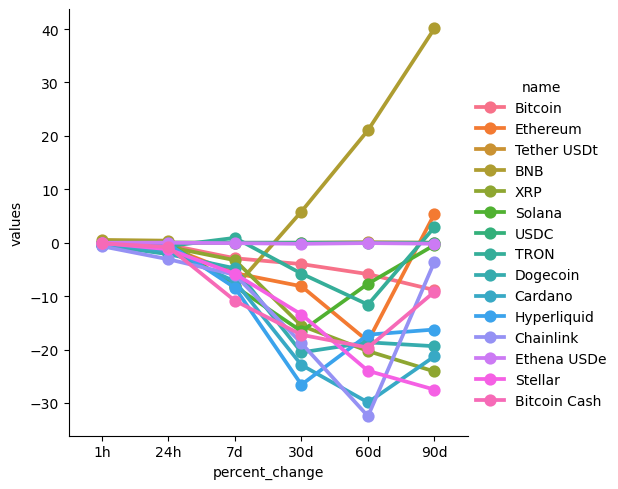

In [107]:
sns.catplot(x='percent_change', y='values', hue='name', data=df9, kind='point')

In [110]:
df10= df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,108162.17723,2025-10-22 14:31:38.691676
15,Bitcoin,108191.81015,2025-10-22 14:45:20.686296
30,Bitcoin,108233.87593,2025-10-22 14:46:23.016227
45,Bitcoin,108150.63049,2025-10-22 14:47:26.224491
60,Bitcoin,108138.88167,2025-10-22 14:48:29.634810


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

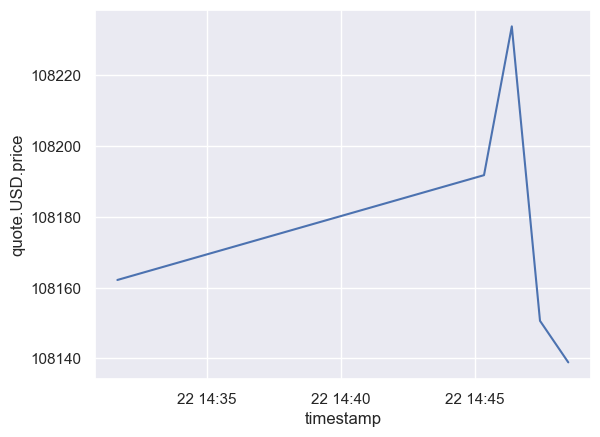

In [111]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data=df10)